In [1]:
import pandas as pd


%matplotlib inline
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")

In [2]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)

In [3]:
def extract_last_word(element):
    return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [4]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


In [5]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

In [6]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


In [7]:
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False)
merged_national_accounts = merged[national_accounts]
print(merged_national_accounts.head())

          Country                   Region_x  Happiness Rank  Happiness Score  \
4          Canada              North America               5            7.427   
7          Sweden             Western Europe               8            7.364   
8     New Zealand  Australia and New Zealand               9            7.286   
9       Australia  Australia and New Zealand              10            7.284   
14  United States              North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
7          0.03157                   1.33171  1.28907   
8          0.03371                   1.25018  1.31967   
9          0.04083                   1.33358  1.30923   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
4                    0.90563  0.63297                        0.32957  ...   
7               

In [8]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)

In [9]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand=True)

In [10]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2006     1
1992     1
2003     1
1995     1
2002     1
1999     1
1998     1
2000     1
Name: Years, dtype: int64


In [11]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

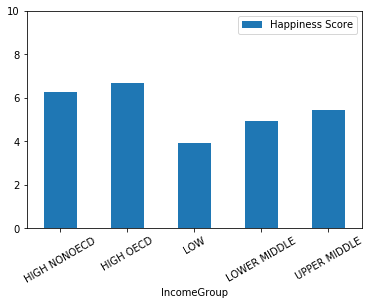

In [13]:
import matplotlib.pyplot as plt

# This will need to be done in the future so 
# get accustomed to using now
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()